In [2]:
from pipelines.DataPipeline import DataPipeline
from transformers.Preprocessing import Preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from utils.Common import Config

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt


In [3]:
RAW_DATA_PATH = "../data/raw/KSI.csv"
df = pd.read_csv(RAW_DATA_PATH)

In [4]:
# fill missing values, adding new columns, extracting useful columns
pc = Preprocessing(df, Config.binary_columns, Config.cat_attribs, Config.num_attribs, Config.label)
new_df = pc.getFrame()

In [5]:
# seperate feature and label
X = new_df[Config.cat_attribs + Config.num_attribs+ Config.binary_columns]
Y = new_df[Config.label]

In [6]:
print(X[Y==1][:1].T)
print(Y[Y==1])

                                      22
VEHTYPE        Automobile, Station Wagon
ROAD_CLASS                Major Arterial
LOCCOORD                    Intersection
DISTRICT           Toronto and East York
TRAFFCTL                  Traffic Signal
LIGHT                           Daylight
RDSFCOND                             Dry
INVTYPE                           Driver
IMPACTYPE          Pedestrian Collisions
INVAGE                           unknown
YEAR                                2006
TIME                                   9
LATITUDE                       43.656345
LONGITUDE                      -79.45249
MONTH                                  3
DAY                                    5
PEDESTRIAN                             1
CYCLIST                                0
AUTOMOBILE                             1
TRUCK                                  0
TRSN_CITY_VEH                          0
PASSENGER                              0
SPEEDING                               0
AG_DRIV         

In [7]:
# pass feature to pipeline and convert it to numerical data
X = DataPipeline(Config.num_attribs,Config.cat_attribs).process(X)

In [8]:
X.isna().sum().sum()

0

In [9]:
Y.value_counts().tolist()

[14246, 2201]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=Config.test_size, stratify=Y, random_state=42)

In [11]:
smote_minority = SMOTE(sampling_strategy = "minority", random_state=42)
X_train_sm, y_train_sm = smote_minority.fit_resample(X_train, y_train)


In [11]:

# Create param grid
param_grid = {'C': [1, 100, 200],  
              'gamma':['scale'],
              'kernel': ['rbf', 'sigmoid' ]}  


clf = GridSearchCV(estimator=SVC(random_state=42),param_grid=param_grid,n_jobs=10,cv=10)
best_clf = clf.fit(X_train_sm, y_train_sm)


In [12]:
best_model = best_clf.best_estimator_
best_clf.best_score_

0.9724917438396341

In [13]:
best_model.score(X_train,y_train)

0.9997719844949456

In [14]:
best_model.score(X_train_sm,y_train_sm)

0.9998683748683749

In [15]:
best_model.score(X_test,y_test)

0.9109422492401216

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_train_pred = best_model.predict(X_train)
y_train_sm_pred = best_model.predict(X_train_sm)
y_test_pred = best_model.predict(X_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_train_sm,y_train_sm_pred))
print(classification_report(y_test,y_test_pred))

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_train_sm,y_train_sm_pred))
print(accuracy_score(y_test,y_test_pred))

print(precision_score(y_train,y_train_pred))
print(precision_score(y_train_sm,y_train_sm_pred))
print(precision_score(y_test,y_test_pred))

print(recall_score(y_train,y_train_pred))
print(recall_score(y_train_sm,y_train_sm_pred))
print(recall_score(y_test,y_test_pred))

print(f1_score(y_train,y_train_pred))
print(f1_score(y_train_sm,y_train_sm_pred))
print(f1_score(y_test,y_test_pred))

print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_train_sm,y_train_sm_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11396
           1       1.00      1.00      1.00      1761

    accuracy                           1.00     13157
   macro avg       1.00      1.00      1.00     13157
weighted avg       1.00      1.00      1.00     13157

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11396
           1       1.00      1.00      1.00     11396

    accuracy                           1.00     22792
   macro avg       1.00      1.00      1.00     22792
weighted avg       1.00      1.00      1.00     22792

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2850
           1       0.69      0.60      0.64       440

    accuracy                           0.91      3290
   macro avg       0.82      0.78      0.80      3290
weighted avg       0.91      0.91      0.91      3290

0.9997719844949456


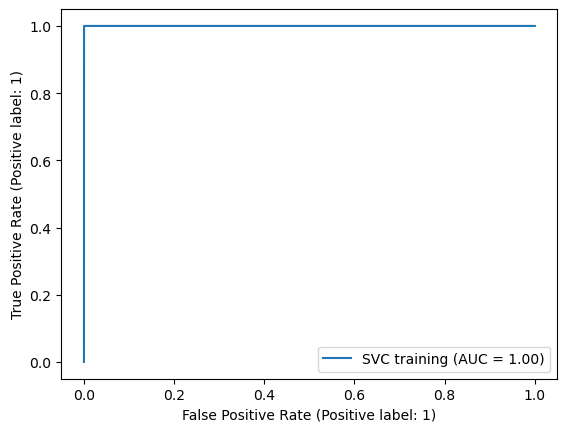

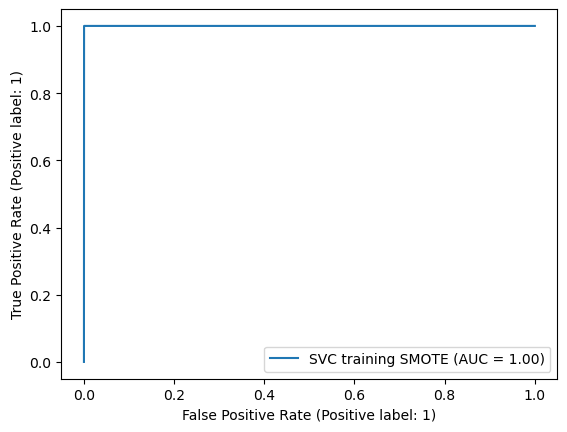

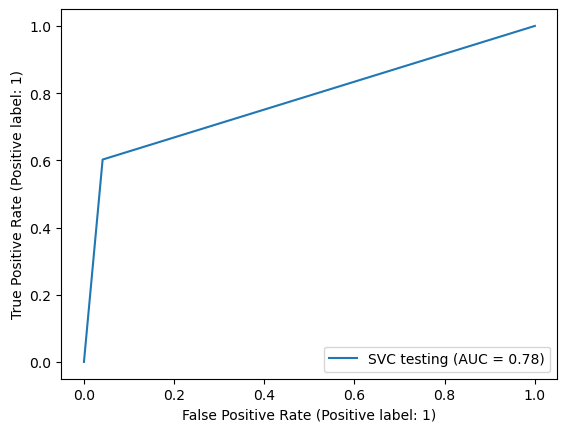

In [15]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
RocCurveDisplay.from_predictions(y_train, y_train_pred, name="SVC training")
RocCurveDisplay.from_predictions(y_train_sm,y_train_sm_pred, name="SVC training SMOTE")
RocCurveDisplay.from_predictions(y_test, y_test_pred, name="SVC testing")
plt.show()

In [17]:
best_clf.best_params_
# {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [18]:
import joblib

best_model = SVC(C= 100, gamma= 'scale', kernel= 'rbf')
best_model.fit(X_train_sm, y_train_sm)
joblib.dump(best_model,'../models/best_model_svc.pkl')


['../models/best_model_svc.pkl']